# Machine failure Classification

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the trian dataset

In [3]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Target feature value counts

In [7]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

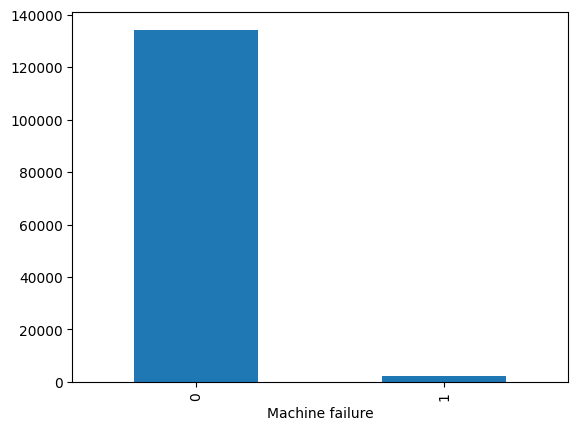

In [8]:
df['Machine failure'].value_counts().plot(kind='bar')

### Seperate X and Y( Machine Failure)

In [9]:
X=df.drop(columns=['id','Product ID','Machine failure'])
Y=df['Machine failure']

In [10]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

### Seperate categorical and continuous features

In [12]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a feature selection pipeline

##### Categorical - Ordinal Encoding

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [16]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [17]:
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ordinal',OrdinalEncoder())])

In [18]:
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [19]:
X_pre=pre1.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Calculate matual information scores

In [20]:
from sklearn.feature_selection import mutual_info_classif
mi= mutual_info_classif(X_pre,Y)
mi

array([0.00565185, 0.00156923, 0.01958507, 0.02013984, 0.00656324,
       0.00742629, 0.02428941, 0.01131022, 0.01948834, 0.00152685,
       0.0116785 ])

In [21]:
X_pre.columns

Index(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF', 'num__OSF',
       'num__RNF', 'cat__Type'],
      dtype='object')

In [22]:
mi=pd.Series(mi)
mi

0     0.005652
1     0.001569
2     0.019585
3     0.020140
4     0.006563
5     0.007426
6     0.024289
7     0.011310
8     0.019488
9     0.001527
10    0.011679
dtype: float64

In [23]:
mi.index=X_pre.columns
mi

num__Air temperature [K]        0.005652
num__Process temperature [K]    0.001569
num__Rotational speed [rpm]     0.019585
num__Torque [Nm]                0.020140
num__Tool wear [min]            0.006563
num__TWF                        0.007426
num__HDF                        0.024289
num__PWF                        0.011310
num__OSF                        0.019488
num__RNF                        0.001527
cat__Type                       0.011679
dtype: float64

In [24]:
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024289
num__Torque [Nm]                0.020140
num__Rotational speed [rpm]     0.019585
num__OSF                        0.019488
cat__Type                       0.011679
num__PWF                        0.011310
num__TWF                        0.007426
num__Tool wear [min]            0.006563
num__Air temperature [K]        0.005652
num__Process temperature [K]    0.001569
num__RNF                        0.001527
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

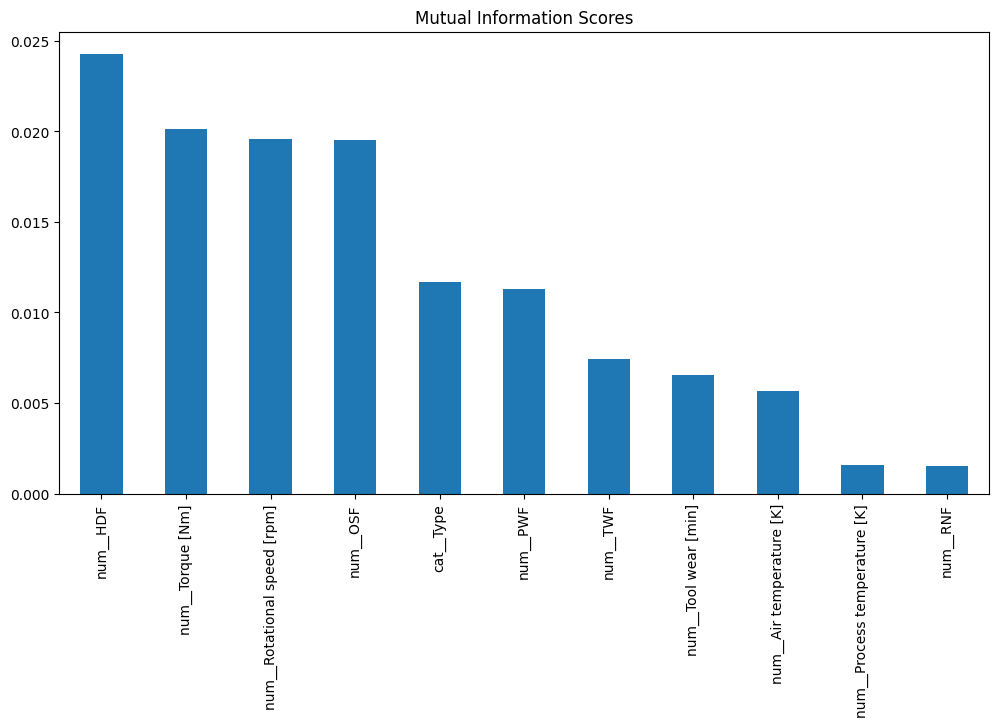

In [25]:
mi.plot(kind='bar',title='Mutual Information Scores',figsize=(12,6))

### HDF, Turque, OSF and Rotational speed are my 4 top  most important features for this dataset

### Create a final pipeline for X

##### cat-OneHotEncoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

In [28]:
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [29]:
pre2=ColumnTransformer([('num',num_pipe2,con),
                        ('cat',cat_pipe2,cat)]).set_output(transform='pandas')

In [30]:
X_pre2=pre2.fit_transform(X)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Apply train test split for X_pre2

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre2,Y,test_size=0.2,random_state=42)

In [32]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [33]:
ytrain.head()

12407     0
85011     0
65292     0
18478     0
100267    0
Name: Machine failure, dtype: int64

In [34]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [35]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

In [36]:
xtrain.shape

(109143, 13)

In [37]:
xtest.shape

(27286, 13)

### Aplgorithm evaluation

##### Because dataset is large more than lakhs of rows skip KNN and SVM

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [39]:
dct={'Logistic':LogisticRegression(),
     'Decision Tree':DecisionTreeClassifier(),
     'Random Forest':RandomForestClassifier(),
     'Gradient Boost':GradientBoostingClassifier()}

In [40]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [42]:
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # Calculate 5 fold cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Print the results for each model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print(f'F1 Cross validated : {f1_cv:.4f}')
    print('\n=============================================================================\n')

Model Name : Logistic

Training F1 : 0.8625
Testing F1 : 0.8649
F1 Cross validated : 0.9301


Model Name : Decision Tree

Training F1 : 0.9950
Testing F1 : 0.7639
F1 Cross validated : 0.8688


Model Name : Random Forest

Training F1 : 0.9944
Testing F1 : 0.8670
F1 Cross validated : 0.9274


Model Name : Gradient Boost

Training F1 : 0.8732
Testing F1 : 0.8637
F1 Cross validated : 0.9285




### Select the Logistic regression model as it has highest score in testing as well as cross validation

In [43]:
best_model=LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [44]:
best_model.score(xtrain,ytrain)

0.9961884866642845

In [45]:
best_model.score(xtest,ytest)

0.9961518727552591

### predict the results for train and test

In [46]:
ypred_tr=best_model.predict(xtrain)
ypred_ts=best_model.predict(xtest)

In [47]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytrain.head()

12407     0
85011     0
65292     0
18478     0
100267    0
Name: Machine failure, dtype: int64

In [49]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [50]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

### Confusion Matrix

In [51]:
best_model.classes_

array([0, 1], dtype=int64)

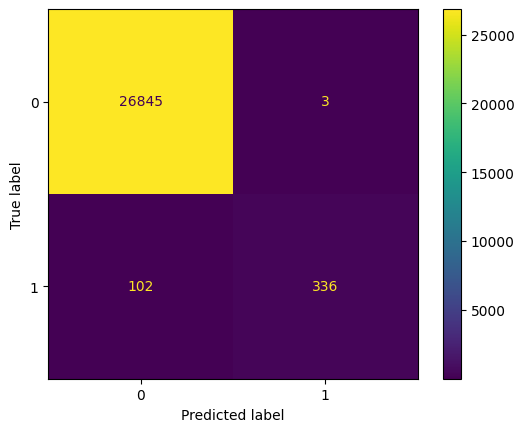

In [52]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_model.classes_)
cfd.plot()

### Print the classification report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### ROC AUC score

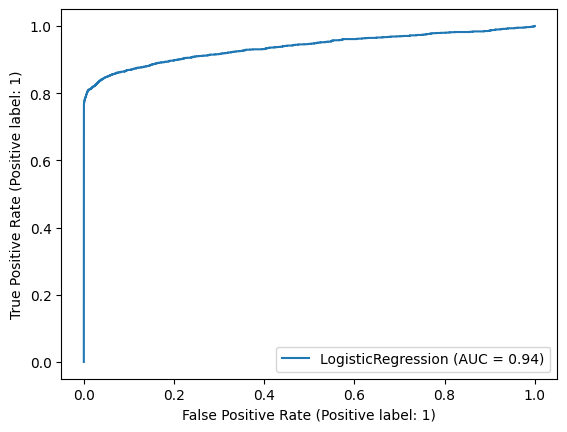

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

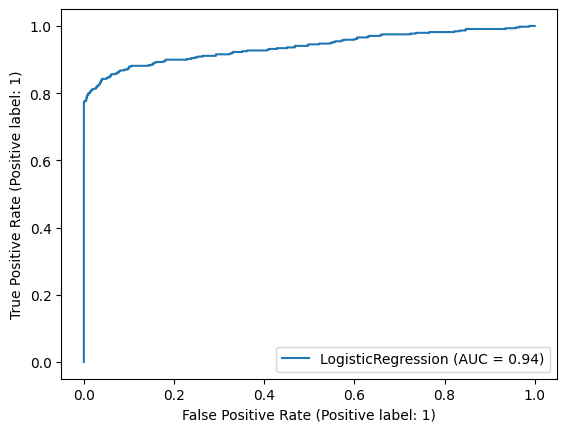

In [55]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

### Above model has f1_macro score of 0.93>0.80, use this model for any predictions

### Predicting out of sample data

In [56]:
xnew=pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [57]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [58]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [59]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

### Apply pre.transform on xnew

In [60]:
xnew_pre=pre2.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Get predictions along with probability

In [61]:
preds=best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
probs=best_model.predict_proba(xnew_pre)[:,1]
probs

array([0.00213785, 0.00104909, 0.00267445, ..., 0.00308065, 0.00242065,
       0.0022749 ])

### Save above results in dataframe format

In [63]:
df_final=xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [64]:
df_final['Machine_failure_pred']=preds
df_final['Probability']=probs

In [65]:
df_final

,id,Machine_failure_pred,Probability
0,136429,0,0.002138
1,136430,0,0.001049
2,136431,0,0.002674
3,136432,0,0.003017
4,136433,0,0.003709
...,...,...,...
90949,227378,0,0.002260
90950,227379,0,0.000445
90951,227380,0,0.003081
90952,227381,0,0.002421


### Show how many machines failed

In [66]:
df_final['Machine_failure_pred'].value_counts()

Machine_failure_pred
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine_failure_pred'>

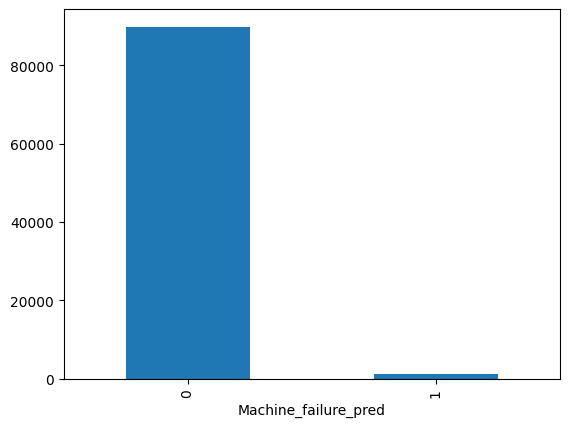

In [67]:
df_final['Machine_failure_pred'].value_counts().plot(kind='bar')

In [68]:
df_final.query("Machine_failure_pred==1")

,id,Machine_failure_pred,Probability
17,136446,1,0.992786
209,136638,1,0.995766
223,136652,1,0.989309
397,136826,1,0.996819
405,136834,1,0.998681
...,...,...,...
90503,226932,1,0.988856
90665,227094,1,0.999807
90679,227108,1,0.752607
90784,227213,1,0.983816


### Save the results to csv file

In [69]:
df_final.to_csv('Results.csv',index=False)